
Starting Data:
+----+-----------+---------+--------+--------+-------+--------+------------+
|    | Date      |   Price |   Open |   High |   Low | Vol.   | Change %   |
+====+===========+=========+========+========+=======+========+============+
|  0 | 18-Jul-10 |     0.1 |    0   |    0.1 |   0.1 | 0.08K  | 0.00%      |
+----+-----------+---------+--------+--------+-------+--------+------------+
|  1 | 19-Jul-10 |     0.1 |    0.1 |    0.1 |   0.1 | 0.57K  | 0.00%      |
+----+-----------+---------+--------+--------+-------+--------+------------+
|  2 | 20-Jul-10 |     0.1 |    0.1 |    0.1 |   0.1 | 0.26K  | 0.00%      |
+----+-----------+---------+--------+--------+-------+--------+------------+
|  3 | 21-Jul-10 |     0.1 |    0.1 |    0.1 |   0.1 | 0.58K  | 0.00%      |
+----+-----------+---------+--------+--------+-------+--------+------------+
|  4 | 22-Jul-10 |     0.1 |    0.1 |    0.1 |   0.1 | 2.16K  | 0.00%      |
+----+-----------+---------+--------+--------+-------+------

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(



Predictions for the Next 10 Days:
+----+-----------+---------+--------------------+--------------------+
|    | Date      |     SVM |   Boosted LightGBM |   Boosted CatBoost |
+====+===========+=========+====================+====================+
|  0 | 16-Mar-24 | 11732.9 |            11350.3 |            16296.5 |
+----+-----------+---------+--------------------+--------------------+
|  1 | 17-Mar-24 | 11732.9 |            11350.3 |            16296.5 |
+----+-----------+---------+--------------------+--------------------+
|  2 | 18-Mar-24 | 11732.9 |            11350.3 |            16296.5 |
+----+-----------+---------+--------------------+--------------------+
|  3 | 19-Mar-24 | 11732.9 |            11350.3 |            16296.5 |
+----+-----------+---------+--------------------+--------------------+
|  4 | 20-Mar-24 | 11732.9 |            11350.3 |            16296.5 |
+----+-----------+---------+--------------------+--------------------+
|  5 | 21-Mar-24 | 11732.9 |            11

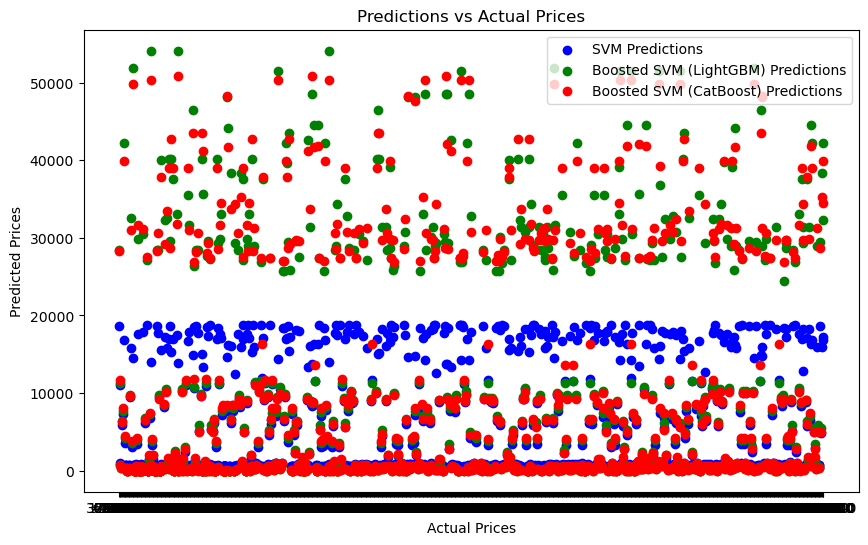

C:\Users\hp\AppData\Local\Temp\ipykernel_19260\3743355236.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


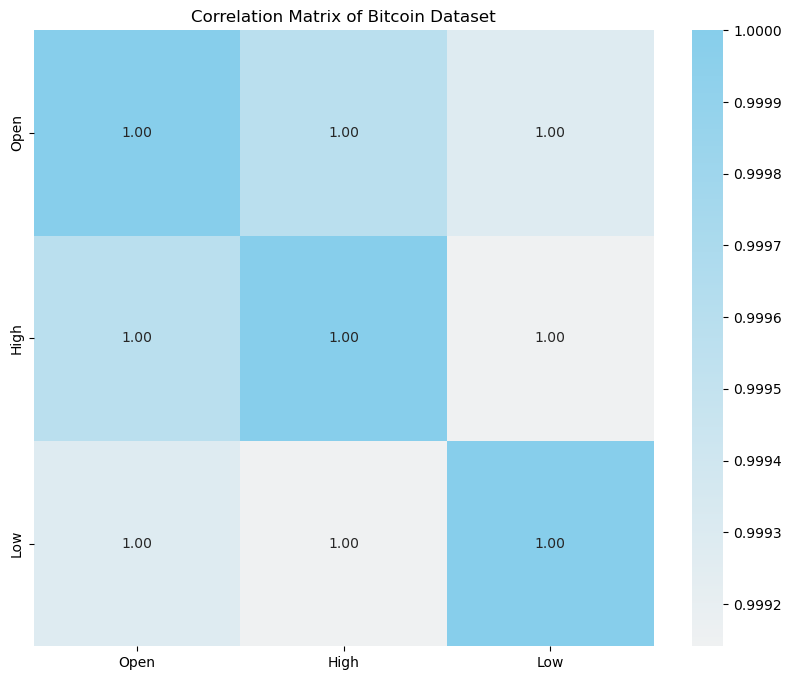


Correlation Matrix:
+------+----------+----------+----------+
|      |     Open |     High |      Low |
+======+==========+==========+==========+
| Open | 1        | 0.999581 | 0.999284 |
+------+----------+----------+----------+
| High | 0.999581 | 1        | 0.999141 |
+------+----------+----------+----------+
| Low  | 0.999284 | 0.999141 | 1        |
+------+----------+----------+----------+


C:\Users\hp\AppData\Local\Temp\ipykernel_19260\3743355236.py:135: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [6]:
import pandas as pd
from datetime import datetime, timedelta
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Load the dataset
df = pd.read_csv("C:/Users/hp/Downloads/Bitcoin Historical Data - Investing.com India.csv")
# Print starting data
print("\nStarting Data:")
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

# Print ending data
print("\nEnding Data:")
print(tabulate(df.tail(), headers='keys', tablefmt='grid'))

# Preprocess the data
df = df.replace(",", "", regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Convert 'Open', 'High', and 'Low' columns to numeric
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Features and target
features = df[['Open', 'High', 'Low']]
target = df['Price']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Data preprocessing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_pred_y = dt_model.predict(x_test)
dt_accuracy = r2_score(y_test, dt_pred_y) * 100

# Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_pred_y = rf_model.predict(x_test)
rf_accuracy = r2_score(y_test, rf_pred_y) * 100

# SVM model
svm_model = SVR(kernel='rbf', C=10, gamma='scale')
svm_model.fit(x_train_scaled, y_train)
svm_pred_y = svm_model.predict(x_test_scaled)
svm_accuracy = r2_score(y_test, svm_pred_y) * 100

# LightGBM model on SVM predictions
svm_pred_train = svm_model.predict(x_train_scaled)
lgbm_model = LGBMRegressor()
lgbm_model.fit(svm_pred_train.reshape(-1, 1), y_train)
svm_pred_test = svm_model.predict(x_test_scaled)
svm_pred_boosted_lgbm = lgbm_model.predict(svm_pred_test.reshape(-1, 1))
boosted_accuracy_lgbm = r2_score(y_test, svm_pred_boosted_lgbm) * 100

# CatBoost model on SVM predictions
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)
catboost_model.fit(svm_pred_train.reshape(-1, 1), y_train)
svm_pred_boosted_catboost = catboost_model.predict(svm_pred_test.reshape(-1, 1))
boosted_accuracy_catboost = r2_score(y_test, svm_pred_boosted_catboost) * 100

# Organize accuracies into a table
accuracy_table = [
    ['Model', 'Accuracy'],
    ['='*10, '='*8],
    ['SVM', f"{svm_accuracy:.2f}%"],
    ['Boosted SVM (LightGBM)', f"{boosted_accuracy_lgbm:.2f}%"],
    ['Boosted SVM (CatBoost)', f"{boosted_accuracy_catboost:.2f}%"]
]

# Print the accuracy table
print("Accuracy of Models:")
print(tabulate(accuracy_table, headers='firstrow', tablefmt='grid'))

# Predictions for the next 10 days
start_date = df['Date'].iloc[-1] + timedelta(days=1)
dates_next_10_days = [(start_date + timedelta(days=i)).strftime('%d-%b-%y') for i in range(10)]

# Store the predictions along with dates in a DataFrame
predictions_df = pd.DataFrame({'Date': dates_next_10_days})

# Predictions using each model

predictions_df['SVM'] = svm_model.predict(features.tail(10))
predictions_df['Boosted LightGBM'] = lgbm_model.predict(svm_model.predict(features.tail(10)).reshape(-1, 1))
predictions_df['Boosted CatBoost'] = catboost_model.predict(svm_model.predict(features.tail(10)).reshape(-1, 1))

# Print the predictions
print("\nPredictions for the Next 10 Days:")
print(tabulate(predictions_df, headers='keys', tablefmt='grid'))
import matplotlib.pyplot as plt

# Create a scatter plot with actual prices on x-axis
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_pred_y, color='blue', label='SVM Predictions')
plt.scatter(y_test, svm_pred_boosted_lgbm, color='green', label='Boosted SVM (LightGBM) Predictions')
plt.scatter(y_test, svm_pred_boosted_catboost, color='red', label='Boosted SVM (CatBoost) Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predictions vs Actual Prices')
plt.legend()
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Define a light color palette
light_palette = sns.light_palette("skyblue", as_cmap=True)

# Plot the correlation matrix as a heatmap with the light color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=light_palette, fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Dataset')
plt.show()
# Generate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix table
print("\nCorrelation Matrix:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='grid'))
